# Detecting Outliers

In [29]:
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [16, 3]

In [32]:
def plot_outliers(outliers, data, method='KNN',
                 halignment='right',
                 valignment='bottom',
                 labels=False):
    ax= data.plot(alpha=0.6)
    if labels:
        for i in outliers['value'].items():
            plt.plot(i[0],i[1],'rx')
            plt.text(i[0],i[1],f'{i[0].date()}',
                    horizontalalignment=halignment,
                    verticalalignment=valignment)
    else:
        data.loc[outliers.index].plot(ax=ax, style='rx')
    
    plt.title(f'NYC Taxi - {method}')
    plt.xlabel('date'); plt.ylabel('# of passengers')
    plt.legend(['nyc taxi','outliers'])
    plt.show()

In [25]:
file=Path('../../datasets/Ch8/nyc_taxi.csv')
nyc_taxi =pd.read_csv(folder/file,
                     index_col='timestamp',
                     parse_dates=True)
nyc_taxi.index.freq='30T'

In [26]:
nyc_dates =  [
        "2014-11-01",
        "2014-11-27",
        "2014-12-25",
        "2015-01-01",
        "2015-01-27"]

<AxesSubplot: title={'center': 'NYC TAXI'}, xlabel='timestamp'>

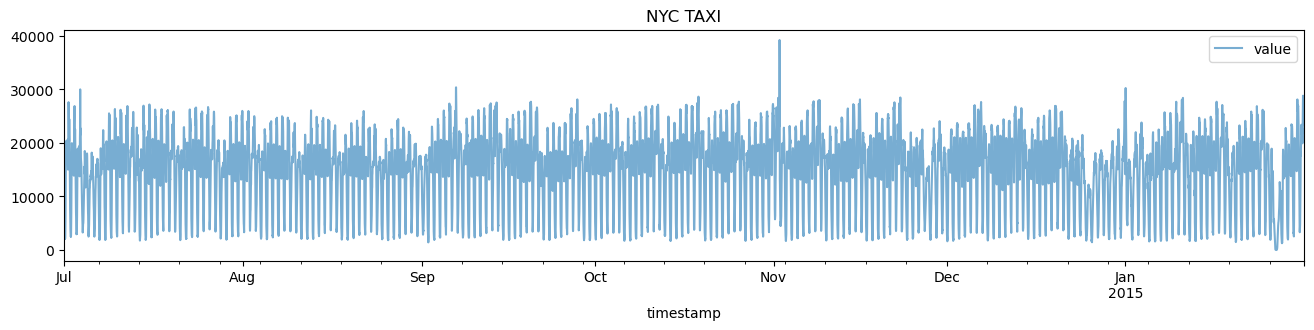

In [30]:
nyc_taxi.plot(title="NYC TAXI", alpha=0.6)

## downsampling or upsampling

In [37]:
tx=nyc_taxi.resample('D').mean() #downsample to day
tx.head()

,value
timestamp,
2014-07-01,15540.979167
2014-07-02,15284.166667
2014-07-03,14794.625000
2014-07-04,11511.770833
2014-07-05,11572.291667


In [40]:
tx.index[0]
tx.shape
tx.index.freq

<Day>

In [42]:
file=Path('../../datasets/Ch8/machine_temp_failure.csv')
machine_temp= pd.read_csv(folder/file,
                         index_col='timestamp',
                         parse_dates=True)


In [48]:
df_downsampled = machine_temp.resample('3D').sum() #3 days
df_downsampled.head()
df_downsampled.index.freq

<3 * Days>

In [50]:
df_downsampled = machine_temp.resample('3B').sum() #3 Business days
df_downsampled.head()
# df_downsampled.index.freq

,value
timestamp,
2013-12-02,50382.133560
2013-12-05,113685.006053
2013-12-10,70050.163937
2013-12-13,127476.152590
2013-12-18,137601.305150


In [51]:
#upsampling
nyc_taxi.resample('15T').mean().head()

,value
timestamp,
2014-07-01 00:00:00,10844.0
2014-07-01 00:15:00,NaN
2014-07-01 00:30:00,8127.0
2014-07-01 00:45:00,NaN
2014-07-01 01:00:00,6210.0


### Resmaple: Group by aggregate 

In [53]:
nyc_taxi.resample('M').agg(['mean','min','max','median','sum'])

value                                
                    mean   min    max   median       sum
timestamp                                               
2014-07-31  14994.084677  1769  29985  16625.5  22311198
2014-08-31  14580.438844  1841  26062  16184.0  21695693
2014-09-30  15623.374306  1431  30373  17244.5  22497659
2014-10-31  16086.851478  1691  28626  17767.5  23937235
2014-11-30  15492.125000  1683  39197  17287.0  22308660
2014-12-31  14813.428763  1459  27804  16587.0  22042382
2015-01-31  14399.790995     8  30236  16061.0  21426889

## Detecting outliers

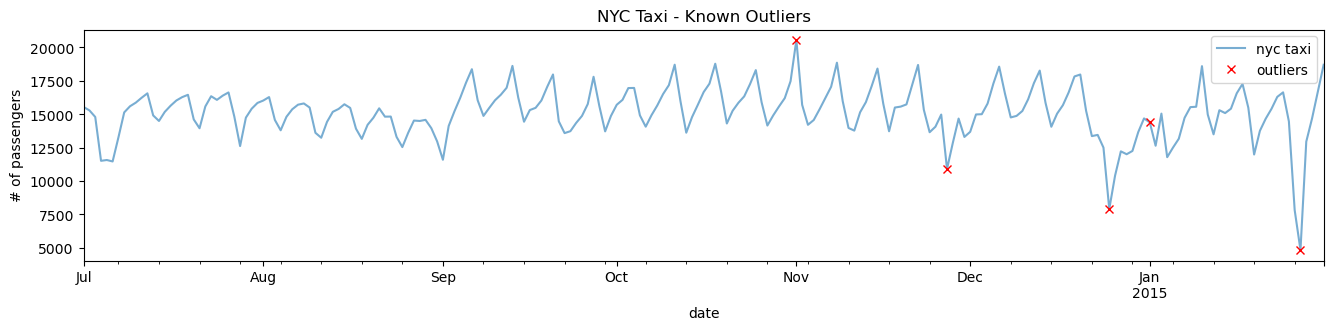

In [34]:
known_outliers=tx.loc[nyc_dates]
plot_outliers(known_outliers, tx, 'Known Outliers')
# tx.head()

<AxesSubplot: ylabel='Count'>

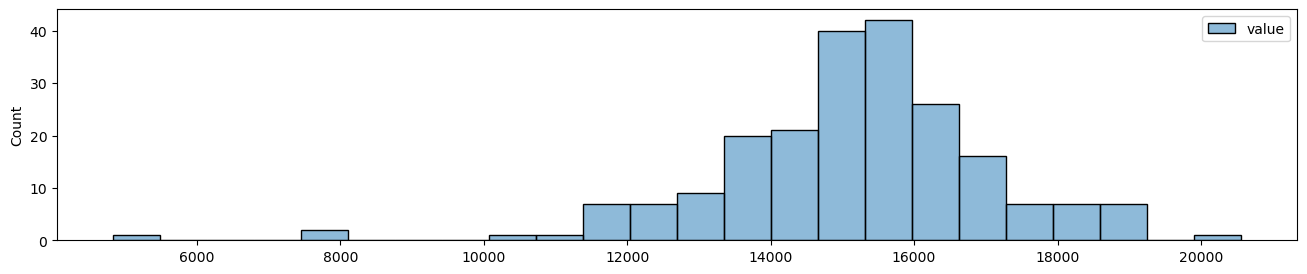

In [55]:
sns.histplot(tx)

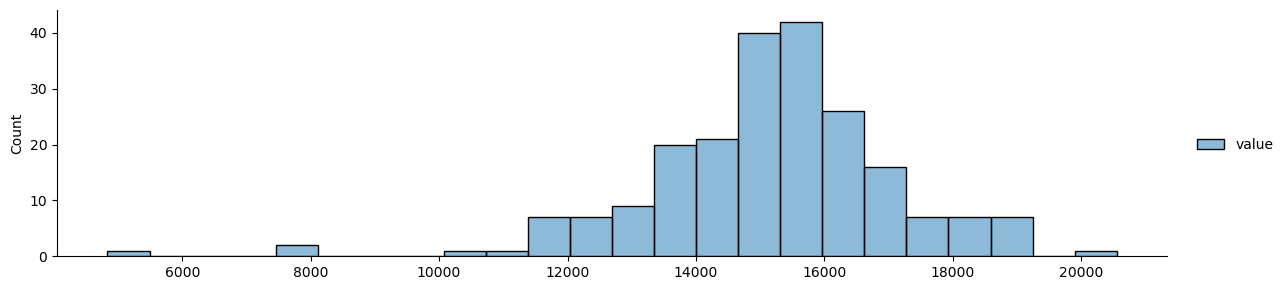

In [56]:
sns.displot(tx,kind='hist',height=3,aspect=4)

<AxesSubplot: >

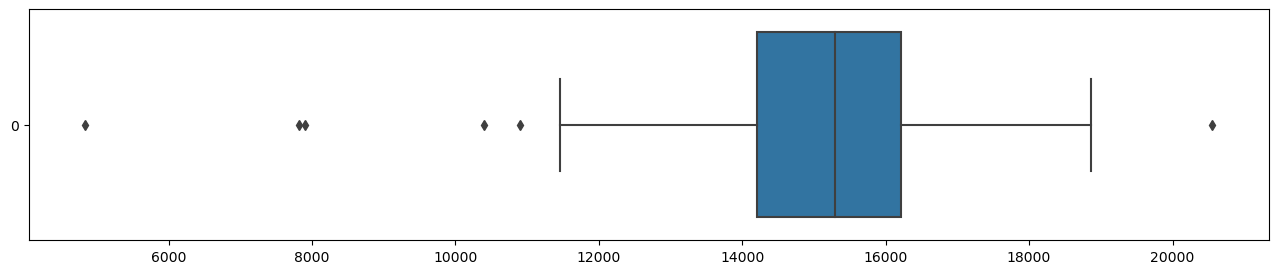

In [66]:
sns.boxplot(tx['value'], orient="h")

<AxesSubplot: >

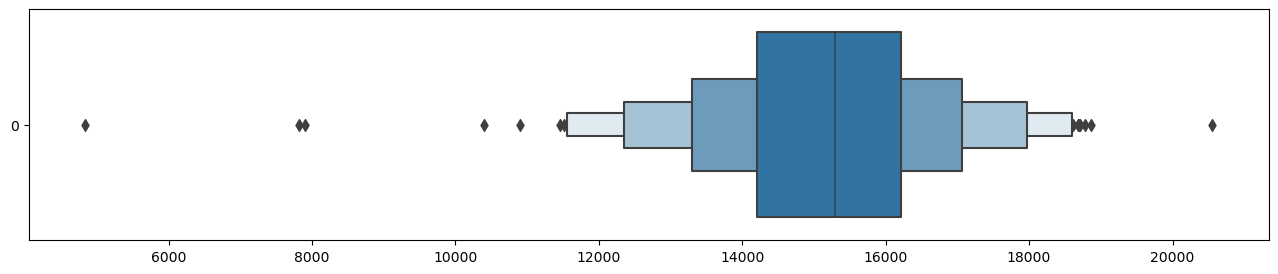

In [67]:
sns.boxenplot(tx['value'],orient='h')

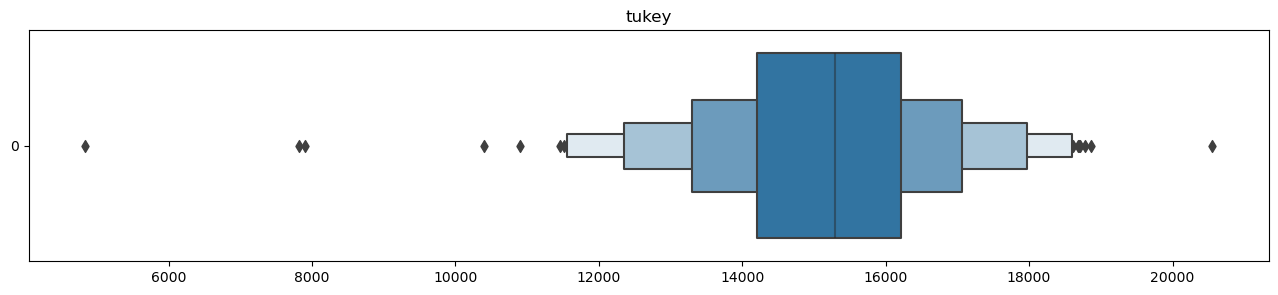

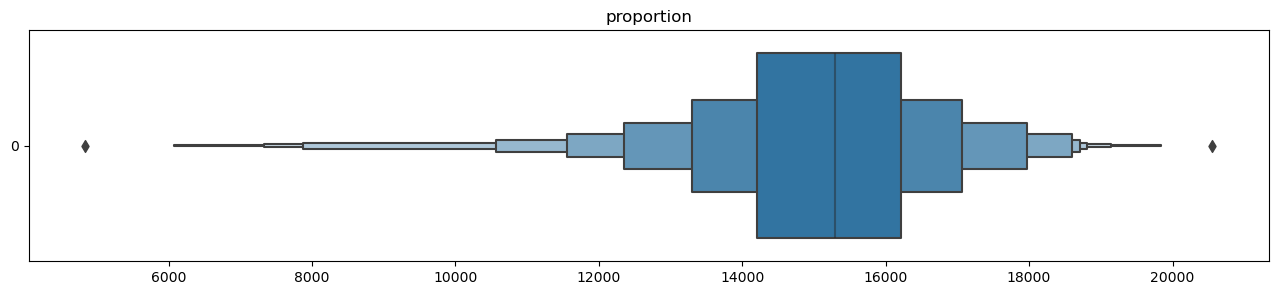

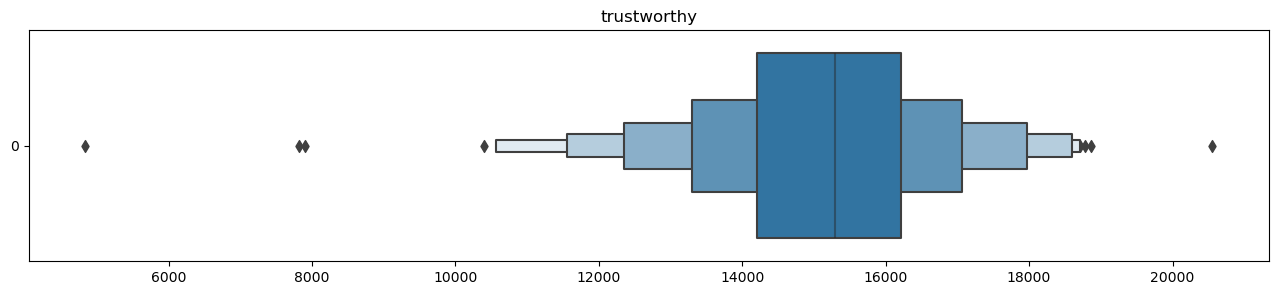

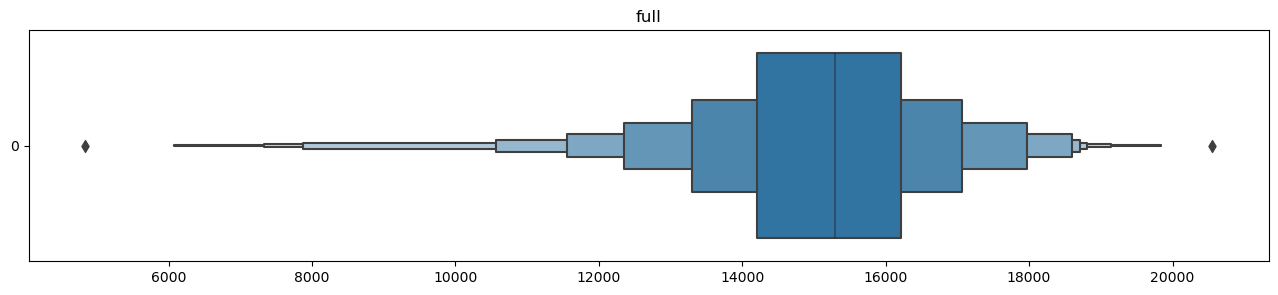

In [69]:
for k in ["tukey", "proportion", "trustworthy", "full"]:
    sns.boxenplot(tx['value'], k_depth=k, orient='h')
    plt.title(k)
    plt.show()

<AxesSubplot: >

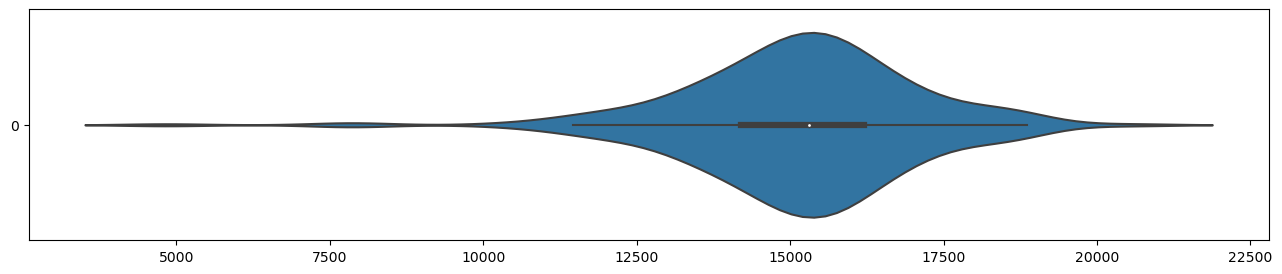

In [70]:
sns.violinplot(tx['value'],orient='h')

### Scatterplot correlation with time

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

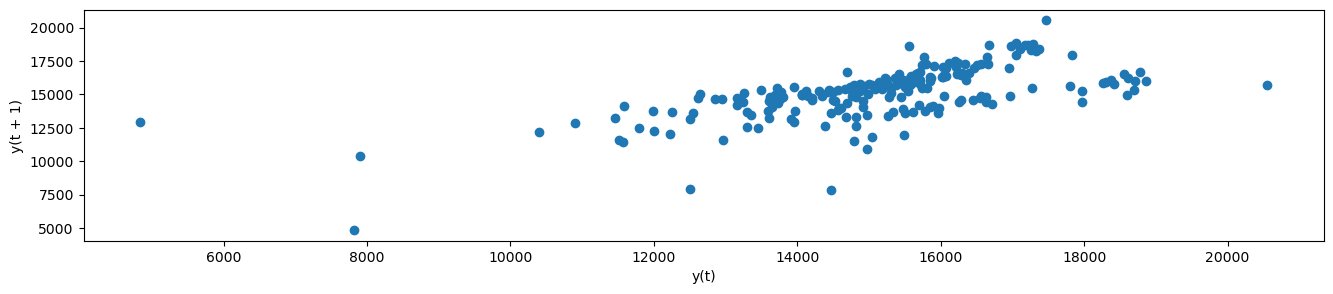

In [71]:
pd.plotting.lag_plot(tx)

<AxesSubplot: >

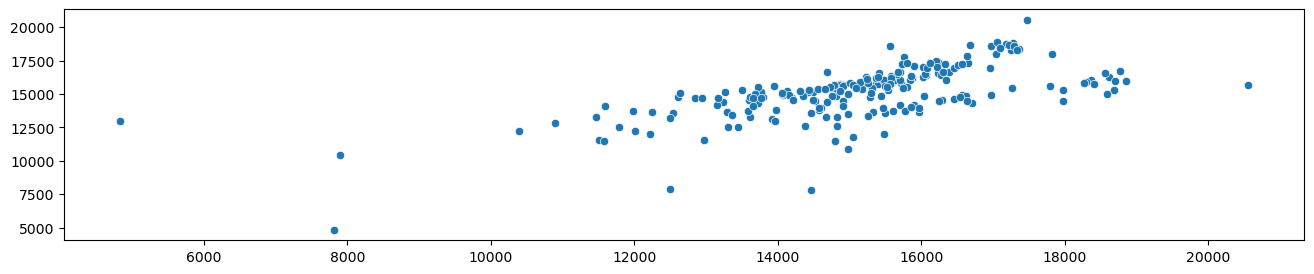

In [73]:
y = tx[1:].values.reshape(-1)
x = tx[:-1].values.reshape(-1)
sns.scatterplot(x=x, y=y)

## Detect with Tukey